In [1]:
import numpy as np
import scipy as sp
from scipy import optimize
from matplotlib import pyplot as plt
from matplotlib import interactive
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.mlab as mlab
interactive(True)
# %matplotlib notebook

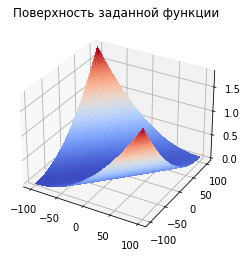

In [2]:
# input function
def f(x):
    return 45 * x[0] ** 2 - 88 * x[0] * x[1] + 45 * x[1] ** 2 + 102 * x[0] + 268 * x[1] - 21

X_1, X_2 = np.meshgrid(np.linspace(-100,100, 1000), np.linspace(-100,100, 1000))
F = f([X_1, X_2])

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X_1,X_2,F, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.title("Поверхность заданной функции")
plt.draw()

Результат отработки метода: 
  final_simplex: (array([[-92.03370083, -92.96627568],
       [-92.03376379, -92.96634965],
       [-92.03364033, -92.96622354]]), array([-17172.20224719, -17172.20224718, -17172.20224718]))
           fun: -17172.202247186775
       message: 'Optimization terminated successfully.'
          nfev: 132
           nit: 70
        status: 0
       success: True
             x: array([-92.03370083, -92.96627568])

Минимальные x:  [-92.03370083 -92.96627568]
Минимальное значение функции:  -17172.202247186775


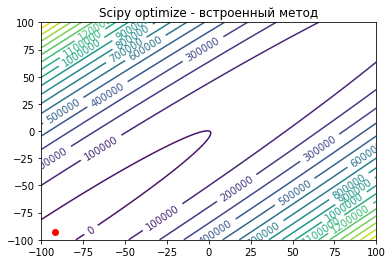

In [3]:
min_info = sp.optimize.minimize(fun = f, x0 = np.array([1, 1]),
                                method='Nelder-Mead', options={'fatol' : 1e-6})
print("Результат отработки метода: \n", min_info)
print("\nМинимальные x: ", min_info.x)
print("Минимальное значение функции: ", min_info.fun)

X_ACC = min_info.x
F_ACC = min_info.fun

plt.figure()
brd = plt.contour(X_1, X_2, F, 20)
plt.clabel(brd, inline=1)
plt.plot(min_info.x[0],min_info.x[1],'ro')
plt.title("Scipy optimize - встроенный метод")
plt.draw()

X минимум: [-92.03370787 -92.96629213]
Минимум функции: -17172.20224719104
Число итераций: 3
Вычислений производной в методе: 6
Вычислений производной в вызываемом методе хорд: 10
Общее число вычислений производной: 16


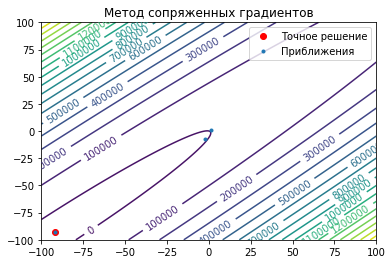

In [4]:
def gradient(x):
    return np.array([ 90 * x[0] - 88 * x[1] + 102,
                        90 * x[1] - 88 * x[0] + 268 ])

# def gradient_auto(x, f):
#     return (np.array([ (f([x[0], x[1] + .00000001]) - f(x)) / .00000001, 
#                       (f([x[0] + .00000001, x[1]]) - f(x)) / .00000001]))

def f_for_single_min(alpha, x, p, f):
    return f([ x[0] + alpha * p[0],
                x[1] + alpha * p[1] ])

def df_for_single_min(alpha, x, p):
    return (90 * p[0] * (x[0] + p[0] * alpha) - 
            88 * (x[0] * p[1] + x[1] * p[0] + 2 * p[0] * p[1] * alpha) + 
            90 * p[1] * (x[1] + p[1] * alpha) + 
            102 * p[0] + 268 * p[1])

def chords(df, outer_x, outer_p, bnd1 = 0, bnd = 1, e = 1e-5):
    count_of_df_call = 0

    db1 = df(bnd1, outer_x, outer_p)
    db2 = df(bnd, outer_x, outer_p)

    x_h = bnd1  - db1 / (db1 - db2) * (bnd1 - bnd)

    count_of_df_call += 2
    while True:
        db1 = df(bnd1, outer_x, outer_p)
        db2 = df(bnd, outer_x, outer_p)
        d_x_h = df(x_h, outer_x, outer_p)
        count_of_df_call += 3
        if abs(d_x_h) <= e:
            return x_h, count_of_df_call
        elif count_of_df_call > 3:
            x_h = bnd1 - db1 / (db1 - db2) * (bnd1 - bnd)
        if d_x_h > 0:
            bnd = x_h
        else:
            bnd1 = x_h

def con_grad (n, x, grad, diff_special_func, sup_func, e = 1e-4):
    """n, x, grad, diff_special_func, sup_func, e = 1e-"""
    con_grad_itt = 1
    df_call_cound_cg = 0
    count_of_df_call_chord = 0
    app_con_grad = [x]

    p = - grad(x)
    df_call_cound_cg += 2
    grad_sqr = np.dot(p,p)

    while True:
        con_grad_itt+=1
        alpha, df_call_count_r = sup_func(diff_special_func, x, p)
        count_of_df_call_chord += df_call_count_r
        x = x + alpha * p
        app_con_grad.append(x)
        new_grad = -1 * grad(x)
        df_call_cound_cg += 2
        sqr_new_grad = np.dot(new_grad, new_grad)
        
        if con_grad_itt % n !=0:
            beta = sqr_new_grad / grad_sqr
        else:
            beta = 0
            
        p = new_grad + beta * p
        grad_sqr = sqr_new_grad

        if np.sqrt(grad_sqr) < e:
            return x, con_grad_itt, df_call_cound_cg, count_of_df_call_chord, app_con_grad

(x_min, con_grad_itt, df_call_cound_cg, 
 count_of_df_call_chord, app_con_grad) = con_grad(3, np.array([1,1]), gradient, df_for_single_min, chords)

print("X минимум:", x_min)
print("Минимум функции:", f(x_min))
print("Число итераций:", con_grad_itt)
print("Вычислений производной в методе:", df_call_cound_cg)
print("Вычислений производной в вызываемом методе хорд:", count_of_df_call_chord)
print("Общее число вычислений производной:", count_of_df_call_chord + df_call_cound_cg)

plt.figure()
cont = plt.contour(X_1, X_2, F, 20)
plt.clabel(cont, inline=1)
plt.plot(X_ACC[0], X_ACC[1], 'or')
plt.plot(np.array(app_con_grad)[:,0], np.array(app_con_grad)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Метод сопряженных градиентов")
plt.draw()

Проверка матрицы Гессe:
  [178.   2.] все ли собственные значения положительные? - да
X минимум: [-92.03370787 -92.96629213]
Минимум функции: -17172.202247190984
Число итераций: 1
Вычислений производной в методе: 10


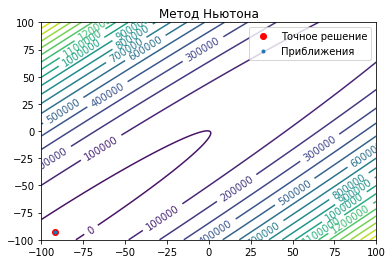

In [5]:
def f_hess(x):
    return np.array([
        [90,-88],
        [-88,90]
    ])

print("Проверка матрицы Гессe:\n ", np.linalg.eigvals(f_hess(np.array([1, 1]))), 
      "все ли собственные значения положительные? - да")

def newton(x, grad, hess, e = 1e-4):
    newton_itt = 0
    df_call_count = 0
    app_newton = []

    while True:
        newton_itt+=1
        x = x - np.dot(np.linalg.inv(hess(x)), grad(x))
        df_call_count += 10
        app_newton.append(x)

        if np.linalg.norm(grad(x)) < e:
            return x, newton_itt, df_call_count, app_newton


x_min, newton_itt, df_call_count, app_newton = newton(np.array([1, 1]), gradient, f_hess)

print("X минимум:", x_min)
print("Минимум функции:", f(x_min))
print("Число итераций:", newton_itt)
print("Вычислений производной в методе:", df_call_count)

plt.figure()
cont = plt.contour(X_1, X_2, F, 20)
plt.clabel(cont, inline=1)
plt.plot(X_ACC[0], X_ACC[1], 'or')
plt.plot(np.array(app_newton)[:,0], np.array(app_newton)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Метод Ньютона")
plt.draw()

Число сжатий:  26 
Число растяжений:  12
X минимум: [-92.0374959  -92.97039975]
Минимум функции: -17172.202211475305
Число итераций: 41
Вычислений функции в методе: 83


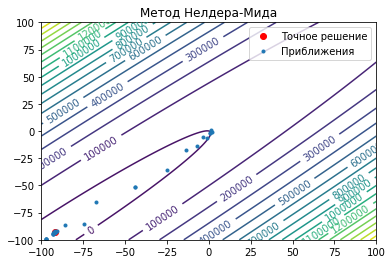

In [6]:
def get_simplex(x, l, n):
    x_simp = np.matrix(x)
    for i in range(n):
        x_simp[0,i] = x[i]

    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(x_simp[0, j] + (np.sqrt(n + 1) - 1) / (n * np.sqrt(2)) * l)
            else:
                row.append(x_simp[0, j] + (np.sqrt(n + 1) + n - 1) / (n * np.sqrt(2)) * l)
        x_simp = np.vstack([x_simp, row])
    return x_simp

def nelder_mead_method(func, x, L, n, e, cap, alpha = 1, beta = 0.5, gamma = 2):

    def goal_achieved(h, g, l, e) -> bool:
        def euklid(a, b):
            sqr = np.square(a - b)
            rasst = np.sum(sqr)
            return rasst
        f_sr = (func(h) + func(g) + func(g)) / 3
        f_sr_kv = ((func(h) - f_sr) ** 2 + (func(g) - f_sr) ** 2 + (func(l) - f_sr) ** 2) / 3
        
        if euklid(h, g) <= e and euklid(h, l) <= e and euklid(g, l) <= e and f_sr_kv <= e:
            return True
        else:
            return False
        
    count_e = 0
    count_r = 0
    nelder_mead_n_iters = 0
    nelder_mead_n_func = 0
    app_nelder_mead = []
    x0 = get_simplex(x, L, n)

    x_0_1 = [x0[0,0], x0[0,1]]
    x_0_2 = [x0[1,0], x0[1,1]]
    x_0_3 = [x0[2,0], x0[2,1]]

    f_x_0_1 = func(x_0_1)
    f_x_0_2 = func(x_0_2)
    f_x_0_3 = func(x_0_3)
    nelder_mead_n_func += 3

    for itr in range(cap):

        sorting_dict = {
            tuple(x_0_1): f_x_0_1,
            tuple(x_0_2): f_x_0_2,
            tuple(x_0_3): f_x_0_3,
        }

        simp_points = sorted(sorting_dict.items(), key = lambda x: x[1], reverse=True)

        h = np.asarray(simp_points[0][0])
        g = np.asarray(simp_points[1][0])
        l = np.asarray(simp_points[2][0])
        func_h = simp_points[0][1]
        func_g = simp_points[1][1]
        func_l = simp_points[2][1]

        x_c = (l + g) / 2

        x_r = x_c + alpha * (x_c - h)
        f_x_r = func(x_r)
        nelder_mead_n_func += 1
        if f_x_r < func_l:
            x_e = x_c + gamma * (x_r - x_c)
            f_x_e = func(x_e)
            nelder_mead_n_func += 1
            count_e += 1
            if f_x_e < f_x_r:
                h = x_e
                func_h = f_x_e
            else:
                h = x_r
                func_h = f_x_r
        elif f_x_r < func_g:
            h = x_r
            func_h = f_x_r
        elif f_x_r < func_h:
            h, x_r = x_r, h
            func_h, f_x_r = f_x_r, func_h
            x_s = x_c + beta * (h - x_c)
            f_x_s = func(x_s)
            nelder_mead_n_func += 1
            count_r += 1
            if f_x_s < func_h:
                h = x_s
                func_h = f_x_s
            else:
                h = l + (h - l) / 2
                func_h = func(h)
                g = l + (g - l) / 2
                func_g = func(g)
                nelder_mead_n_func += 2
        else:
            x_s = x_c + beta * (h - x_c)
            f_x_s = func(x_s)
            nelder_mead_n_func += 1
            count_r += 1
            if f_x_s < func_h:
                h = x_s
                func_h = f_x_s
            else:
                h = l + (h - l) / 2
                func_h = func(h)
                g = l + (g - l) / 2
                func_g = func(g)
                nelder_mead_n_func += 2

        x_0_1 = h
        x_0_2 = g
        x_0_3 = l
        f_x_0_1 = func_h
        f_x_0_2 = func_g
        f_x_0_3 = func_l

        app_nelder_mead.append(l)

        if goal_achieved(x_0_1,x_0_2,x_0_3,e):
            print("Число сжатий: ", count_r, "\nЧисло растяжений: ", count_e)
            return l, nelder_mead_n_iters, nelder_mead_n_func,app_nelder_mead

        nelder_mead_n_iters +=1
    
(x_min, nelder_mead_n_iters, 
 nelder_mead_n_func, 
 app_nelder_mead) = nelder_mead_method(func=f, x=np.array([1, 1]), L = 0.9, n = 2, e = 1e-4, cap = 200)

print("X минимум:", x_min)
print("Минимум функции:", f(x_min))
print("Число итераций:", nelder_mead_n_iters)
print("Вычислений функции в методе:", nelder_mead_n_func)

plt.figure()
cont = plt.contour(X_1, X_2, F, 20)
plt.clabel(cont, inline=1)
plt.plot(X_ACC[0], X_ACC[1], 'or')
plt.plot(np.array(app_nelder_mead)[:,0], np.array(app_nelder_mead)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Метод Нелдера-Мида")
plt.draw()

X минимум: [-92.03375037 -92.96634546]
Минимум функции: -17172.20224718107
Число успешных шагов: 43
Итераций всего:  1924
Вычислений функции в методе: 2039


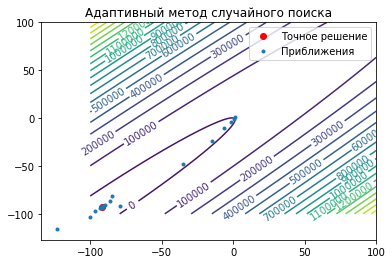

In [7]:
def random_adapt_method(func, x, M, a, b, N, e = 1e-4):
    """func, x, M, a, b, N, e = 1e-4"""

    random_adapt_n_func = 0
    app_random_adapt = []

    t = 1
    j = 1
    f_x = func(x)
    app_random_adapt.append(x)
    random_adapt_n_func+=1
    itera = 1
    k = 0

    while True:
        E = np.random.uniform(-1, 1, len(x))
        itera += 1
        y = x + t * E / np.linalg.norm(E)
        f_y = func(y)
        random_adapt_n_func+=1

        if f_y < f_x:
            z = x + a * (y-x)
            f_z = func(z)
            random_adapt_n_func += 1
            if f_z < f_x:
                x = z
                app_random_adapt.append(x)
                f_x = f_z
                t *= a
                k += 1
                if k < N:
                    j = 1
                else:
                    return x, k, random_adapt_n_func, app_random_adapt, itera
        if j < M:
            j += 1
        else:
            if t < e:
                return x, k, random_adapt_n_func, app_random_adapt, itera
            t *= b
            j = 1
            
(x_min, random_adapt_n_iters, 
random_adapt_n_func, app_random_adapt,
iterations) = random_adapt_method(f, np.array([1,1]),
                                  10, 1.99, 0.8, 2000)

print("X минимум:", x_min)
print("Минимум функции:", f(x_min))
print("Число успешных шагов:", random_adapt_n_iters)
print("Итераций всего: ", iterations)
print("Вычислений функции в методе:", random_adapt_n_func)

plt.figure()
cont = plt.contour(X_1, X_2, F, 20)
plt.clabel(cont, inline=1)
plt.plot(X_ACC[0], X_ACC[1], 'or')
plt.plot(np.array(app_random_adapt)[:,0], np.array(app_random_adapt)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Адаптивный метод случайного поиска")
plt.draw()

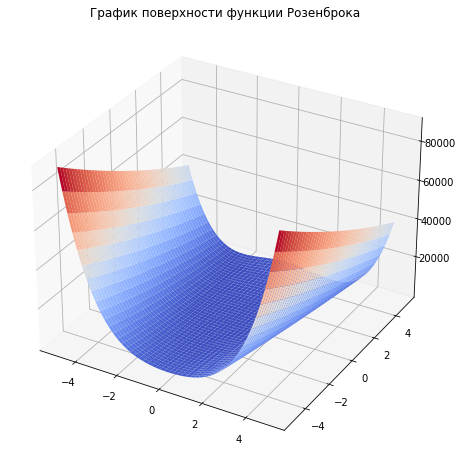

In [8]:
def rozen(x):
    return 100 * (x[0] ** 2 -x[1]) ** 2 + (x[0] - 1) ** 2

x_1 = np.linspace(-5,5, 1000)
x_2 = np.linspace(-5,5, 1000)

X_1, X_2 = np.meshgrid(x_1,x_2)

F_rozen = rozen([X_1, X_2])

fig_rozen = plt.figure(figsize= [12,8])
ax_rozen = fig_rozen.add_subplot(projection = '3d')
ax_rozen.plot_surface(X_1, X_2, F_rozen, cmap = cm.coolwarm)
plt.title("График поверхности функции Розенброка")
plt.draw()

Общие данные по минимизации: 
  final_simplex: (array([[1.00000102, 1.00000004],
       [1.00004129, 1.00007952],
       [1.00002913, 1.00006291]]), array([4.05759022e-10, 2.64786509e-09, 3.01117664e-09]))
           fun: 4.0575902202767407e-10
       message: 'Optimization terminated successfully.'
          nfev: 187
           nit: 100
        status: 0
       success: True
             x: array([1.00000102, 1.00000004])
Точка минимума:  [1.00000102 1.00000004]
Минимум:  4.0575902202767407e-10


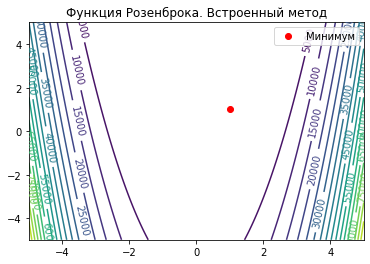

In [9]:
minimum = sp.optimize.minimize(fun=rozen,x0=np.array([-1,1]), method='Nelder-Mead', options={'fatol': 1e-5})
print("Общие данные по минимизации: \n",minimum)
print("Точка минимума: ",minimum.x)
print("Минимум: ",minimum.fun)
plt.figure()
cont = plt.contour(X_1, X_2, F_rozen, 20)
plt.clabel(cont, inline=1)
plt.plot(minimum.x[0],minimum.x[1],'ro')
plt.legend(['Минимум'])
plt.title("Функция Розенброка. Встроенный метод")
plt.draw()

Точка минимума: [0.99999763 0.99999524]
Минимум: 5.649009465941677e-12
Число итераций: 4
Вычислений производной в методе: 8
Вычислений функции во вспомогательном методе золотого сечения: 75
Общее число вычислений функции: 83


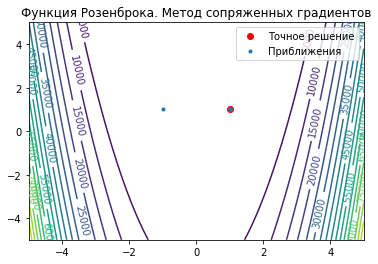

In [10]:
def rozen_grad(x):
    x = np.asarray(x)
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    grad = np.zeros_like(x)
    grad[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2 * (1-xm)
    grad[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    grad[-1] = 200*(x[-1]-x[-2]**2)
    return grad

def rozen_for_single_min(alpha,x,p):
    return  rozen([
        x[0] + alpha * p[0],
        x[1] + alpha * p[1]
    ])

def rozen_diff_for_single_min(alpha,x,p):
    return (200 * ((x[0] + alpha * p[0])**2 - x[1] - 
                   alpha * p[1]) * (2 * (x[0] + alpha * p[0]) * p[0] - p[1]) + 
            2 * (x[0] + alpha * p[0] - 1) * p[0])

def golden_ratio_method(func, outer_x, outer_p, bound_1 = 0, bound_2 = 1, e = 1e-5):
    n_gold_func = 0
    x_1 = bound_1 + (3 - np.sqrt(5)) / 2 * (bound_2 - bound_1)
    y_1 = func(x_1,outer_x, outer_p)
    x_2 = bound_1 + bound_2 - x_1
    y_2 = func(x_2,outer_x, outer_p)
    n_gold_func += 2

    e_gold = (bound_2 - bound_1) / 2

    while 1:
        if y_1 >= y_2:
            bound_1 = x_1
            x_1 = x_2
            y_1 = y_2
            x_2 = bound_1 + bound_2 - x_1
            y_2 = func(x_2,outer_x, outer_p)
        else:
            bound_2 = x_2
            x_2 = x_1
            y_2 = y_1
            x_1 = bound_1 + bound_2 - x_2
            y_1 = func(x_1,outer_x, outer_p)

        n_gold_func += 1
        e_gold *= (np.sqrt(5) - 1) / 2

        if e_gold <= e: break

    return (bound_1 + bound_2) / 2, n_gold_func

(x_min, sopr_grad_n_itr, sopr_grad_n_diff, n_func_golden, 
 app_sopr_grad) = con_grad(2, np.array([-1, 1]), 
                           rozen_grad, rozen_for_single_min, golden_ratio_method, 1e-5)

print("Точка минимума:", x_min)
print("Минимум:", rozen(x_min))
print("Число итераций:", sopr_grad_n_itr)
print("Вычислений производной в методе:", sopr_grad_n_diff)
print("Вычислений функции во вспомогательном методе золотого сечения:", n_func_golden)
print("Общее число вычислений функции:", n_func_golden + sopr_grad_n_diff)

plt.figure()
cont = plt.contour(X_1, X_2, F_rozen, 20)
plt.clabel(cont, inline=1)
plt.plot(1, 1, 'ro')
plt.plot(np.array(app_sopr_grad)[:,0], np.array(app_sopr_grad)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Функция Розенброка. Метод сопряженных градиентов")
plt.draw()

Точка минимума: [1. 1.]
Минимум: 6.198277347547795e-27
Число итераций: 2
Вычислений производной в методе: 20


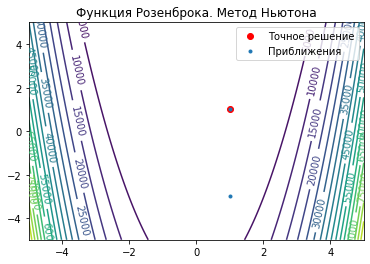

In [11]:
def rozen_hess(x):
    x = np.array(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

(x_min, newton_itt, 
 df_call_count, app_newton) = newton(np.array([-1, 1]), 
                                     rozen_grad, rozen_hess, 1e-5)

print("Точка минимума:", x_min)
print("Минимум:", rozen(x_min))
print("Число итераций:", newton_itt)
print("Вычислений производной в методе:", df_call_count)

plt.figure()
cont = plt.contour(X_1, X_2, F_rozen, 20)
plt.clabel(cont, inline=1)
plt.plot(1, 1, 'ro')
plt.plot(np.array(app_newton)[:,0], np.array(app_newton)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Функция Розенброка. Метод Ньютона")
plt.draw()

Число сжатий:  30 
Число растяжений:  35
Точка минимума: [1.0003872  1.00067034]
Минимум: 1.2360062187783532e-06
Число итераций: 78
Вычислений функций в методе: 147


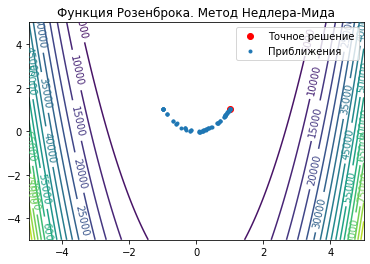

In [12]:
(x_min, nelder_mead_n_iters, 
 nelder_mead_n_func, app_nelder_mead) = nelder_mead_method(rozen, 
                                                          np.array([-1, 1]), 0.3, 2, 1e-5, 800)

print("Точка минимума:", x_min)
print("Минимум:", rozen(x_min))
print("Число итераций:", nelder_mead_n_iters)
print("Вычислений функций в методе:", nelder_mead_n_func)

plt.figure()
cont = plt.contour(X_1, X_2, F_rozen, 20)
plt.clabel(cont, inline=1)
plt.plot(1, 1, 'ro')
plt.plot(np.array(app_nelder_mead)[:,0], np.array(app_nelder_mead)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Функция Розенброка. Метод Недлера-Мида")
plt.draw()

X минимум: [1.00009077 1.00019079]
Минимум функции: 351.0609546401039
Число успешных шагов: 38
Итераций всего:  5272
Вычислений функции в методе: 5372


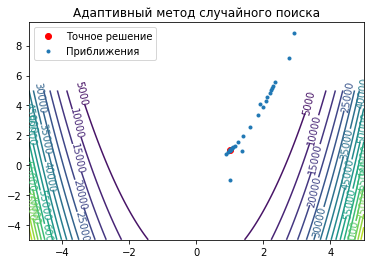

In [13]:
(x_min, random_adapt_n_iters, 
random_adapt_n_func, app_random_adapt,
iterations) = random_adapt_method(rozen, np.array([1, -1]),
                                  30, 1.99, 0.8, 2000)

print("X минимум:", x_min)
print("Минимум функции:", f(x_min))
print("Число успешных шагов:", random_adapt_n_iters)
print("Итераций всего: ", iterations)
print("Вычислений функции в методе:", random_adapt_n_func)

plt.figure()
cont = plt.contour(X_1, X_2, F_rozen, 20)
plt.clabel(cont, inline=1)
plt.plot(1, 1, 'or')
plt.plot(np.array(app_random_adapt)[:,0], np.array(app_random_adapt)[:,1], '.')
plt.legend(['Точное решение', 'Приближения'])
plt.title("Адаптивный метод случайного поиска")
plt.draw()